In [16]:
### original dataset visualization

def show_orgi_data(dataset_name):
    # import all packages
#     import os
#     import tarfile
#     from six.moves import urllib
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    
#     # fetch data
#     DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
#     HOUSING_PATH = os.path.join("datasets", "housing")
#     HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
#     os.makedirs(HOUSING_PATH, exist_ok=True)
#     tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
#     urllib.request.urlretrieve(HOUSING_URL, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=HOUSING_PATH)
#     housing_tgz.close()
    
    # load data
#     csv_path = os.path.join(HOUSING_PATH, "housing.csv")
#     data = pd.read_csv(csv_path)
    data = pd.read_csv(dataset_name)
    data = data.iloc[0:10000] 
    # show original data
    data.hist(bins=50, figsize=(20,15))
    plt.show()
    
    data.info()
    
    return data
        

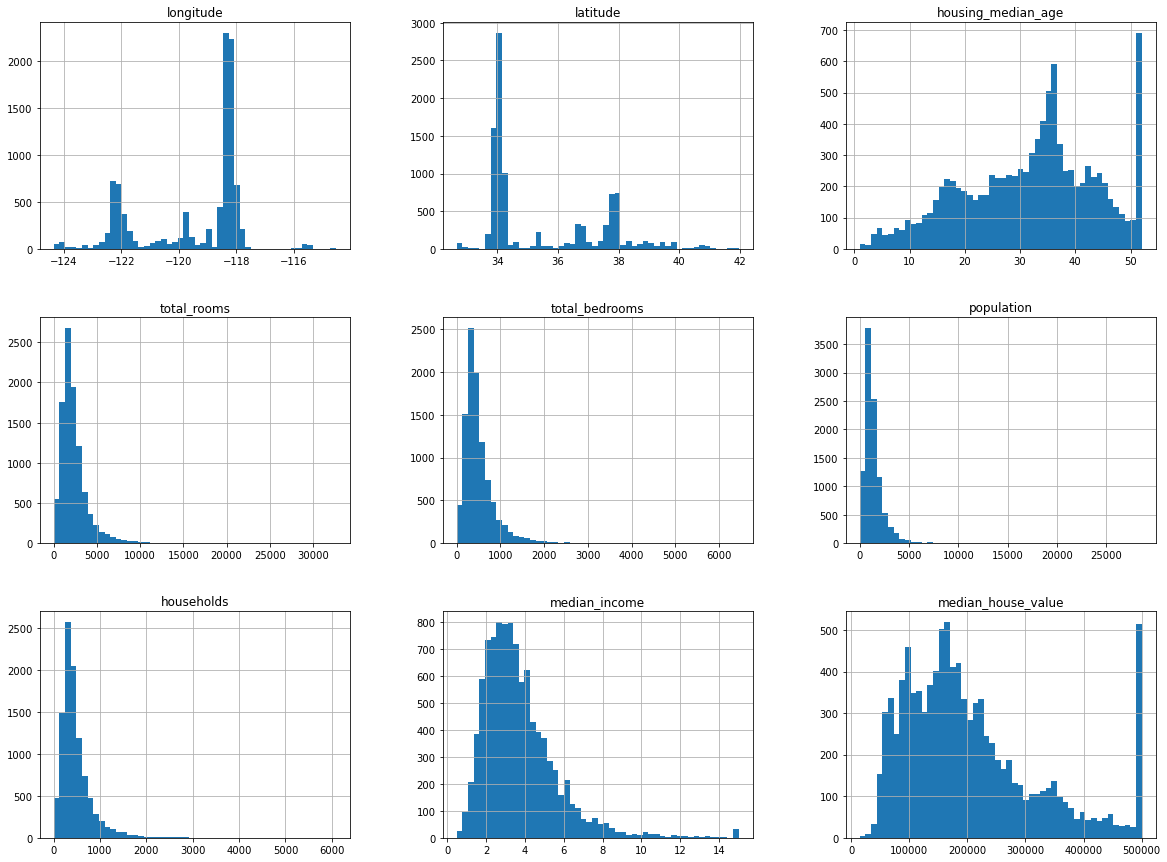

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10000 non-null  float64
 1   latitude            10000 non-null  float64
 2   housing_median_age  10000 non-null  float64
 3   total_rooms         10000 non-null  float64
 4   total_bedrooms      9900 non-null   float64
 5   population          10000 non-null  float64
 6   households          10000 non-null  float64
 7   median_income       10000 non-null  float64
 8   median_house_value  10000 non-null  float64
 9   ocean_proximity     10000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 781.4+ KB


In [17]:
data= show_orgi_data(dataset_name='housing.csv')

In [2]:
### data pre-processing

def pre_processing(data):
    # checnk nonnull
    data = data.fillna(data.mean())
    
    #encode string variable
    data['ocean_proximity']= (data['ocean_proximity'].astype('category')).cat.codes
    
    # split the data to end up with the following dataframes: X_train,X_test,y_train, y_test
    from sklearn.model_selection import train_test_split
    X = data.drop(columns=['median_house_value'])
    y = data.median_house_value   
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)
    
    # standardscaler
    from sklearn.preprocessing import StandardScaler
    xscaler = StandardScaler()
    yscaler = StandardScaler()
    X_train_scaled = xscaler.fit_transform(X_train)
    X_test_scaled = xscaler.transform(X_test)
    y_train_scaled = yscaler.fit_transform(y_train.values.reshape(-1,1))
    y_test_scaled = yscaler.transform(y_test.values.reshape(-1,1))
    
    # perform a boxplot of X_train_scaled here
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    ax = sns.boxplot(data=X_train)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
    ax.set_title("original data distribution")
    plt.show()
    
    ax = sns.boxplot(data=X_train_scaled)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
    ax.set_title("pre_processing data distribution")
    plt.show()
   
    return X_train, X_test, y_train, y_test

In [3]:
### plot learning curve
def plot_learning_curves(model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    train_errors, test_errors = [], []
    for m in range(10, len(X_train),1000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    plt.show()

In [4]:
### plot observed data and predicted data
def plot_residual(model,X_train, X_test, y_train, y_test):
    from sklearn import tree
    from sklearn.metrics import mean_squared_error, r2_score
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("RMSE training fit: %.03f" %np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("R2 training fit: %.03f " %r2_score(y_train,y_pred_train))
    print("RMSE prediction: %.03f" %np.sqrt(mean_squared_error(y_test,y_pred_test)))
    print("R2 prediction: %.03f " %r2_score(y_test,y_pred_test))

    minlim = y_test.min()
    maxlim = y_test.max()
    # predicted/actual plot for test set
    ax = sns.jointplot(x=y_test,y=y_pred_test, height=5,xlim=(minlim,maxlim),ylim=(minlim,maxlim))
    ax.ax_joint.set_xlabel('observed csMPa')
    ax.ax_joint.set_ylabel('predicted csMPa')
    plt.figure()
    sns.distplot(y_test-y_pred_test)
    plt.xlabel('Residuals')
    plt.show()

In [10]:
### plot observed data and predicted data for NNs model
def plot_residual_nns(model,X_train, X_test, y_train, y_test):
    from sklearn import tree
    from sklearn.metrics import mean_squared_error, r2_score
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    y_pred_train = np.concatenate(model.predict(X_train).astype('float'))
    y_pred_test = np.concatenate(model.predict(X_test).astype('float'))
    print(y_pred_train, y_pred_train.shape)
    print(y_pred_test, y_pred_test.shape)

    print("RMSE training fit: %.03f" %np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("R2 training fit: %.03f " %r2_score(y_train,y_pred_train))
    print("RMSE prediction: %.03f" %np.sqrt(mean_squared_error(y_test,y_pred_test)))
    print("R2 prediction: %.03f " %r2_score(y_test,y_pred_test))

    minlim = y_test.min()
    maxlim = y_test.max()
    # predicted/actual plot for test set
    ax = sns.jointplot(x=y_test,y=y_pred_test, height=5,xlim=(minlim,maxlim),ylim=(minlim,maxlim))
    ax.ax_joint.set_xlabel('observed csMPa')
    ax.ax_joint.set_ylabel('predicted csMPa')
    plt.figure()
    sns.distplot(y_test-y_pred_test)
    plt.xlabel('Residuals')
    plt.show()

In [5]:
### Model 1: Decision Trees
# with best parameters
def dt_model(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.compose import TransformedTargetRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    sc = StandardScaler()
    dtr = DecisionTreeRegressor(splitter='best',random_state=42,min_samples_split=20,max_features=9,criterion='mse')
    pipe = Pipeline([('scaler',sc),('tree', dtr)])
    model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())   
    model.fit(X_train, y_train)
    plot_residual(model,X_train, X_test, y_train, y_test)
    plot_learning_curves(model, X_train, X_test, y_train, y_test)


In [6]:
### Model 2: random forests

def rf_model(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.compose import TransformedTargetRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline    

    sc = StandardScaler()
    rfr = RandomForestRegressor(n_estimators=2000,max_features=5)
    pipe = Pipeline([('scaler',sc),('forest', rfr)])
    model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
    model.fit(X_train, y_train)
    plot_residual(model,X_train, X_test, y_train, y_test)
#     plot_learning_curves(model, X_train, X_test, y_train, y_test)



In [7]:
### Model 3: adaboost
def ab_model(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.compose import TransformedTargetRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline 
    
    sc = StandardScaler()
    dtr = DecisionTreeRegressor(splitter='best',random_state=42)
    pipe = AdaBoostRegressor(base_estimator = dtr,n_estimators=2000)
    model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
    model.fit(X_train, y_train)
    plot_residual(model,X_train, X_test, y_train, y_test)
#     plot_learning_curves(model, X_train, X_test, y_train, y_test)



In [8]:
### Model 4: gbt
def gbt_model(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.compose import TransformedTargetRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline 
    import pickle
    
    sc = StandardScaler()
    gbt = GradientBoostingRegressor(n_estimators=2000,max_features=5)
    pipe = Pipeline([('scaler',sc),('gbt', gbt)])
    model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
    model.fit(X_train, y_train)
    clf_gbt_2 = pickle.load(open('decision_gbt_model_2.pkl', 'rb'))
    plot_residual(clf_gbt_2,X_train, X_test, y_train, y_test)



In [ ]:
### Model 5: Gaussian process regression
def gp_model(X_train, X_test, y_train, y_test):
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

    kernel = DotProduct() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel,
                        random_state=0).fit(X_train, y_train)
    plot_residual(model,X_train, X_test, y_train, y_test)

In [ ]:
### Model 6: Support vector regression
def svm_model(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVR
    svm_poly_reg = SVR(kernel="poly", degree=3, C=100, epsilon=1.5)
    svm_poly_reg.fit(X_train, hy_train)
    plot_residual(model,X_train, X_test, y_train, y_test)
    

In [ ]:
### Model 7: KNN Regression
def knn_model(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsRegressor
    neigh = KNeighborsRegressor(n_neighbors=1)
    neigh.fit(X_train, y_train)
    plot_residual(model,X_train, X_test, y_train, y_test)

In [ ]:
### Model 8: NNs
def nns_model(X_train, X_test, y_train, y_test, epochs = 10, batch_size = 256):
    from sklearn.model_selection import train_test_split
    from keras import regularizers
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)
    
    model = Sequential([
        Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        Dropout(0.5),
        Dense(30, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
    hist = model.fit(X_train, 
                      y_train, 
                      epochs=epochs, 
                      batch_size=batch_size,
                      validation_data=(X_valid, y_valid))
    
    plot_learning_curves(model, X_train, X_test, y_train, y_test)
    plot_residual_nns(model,X_train, X_test, y_train, y_test)

In [11]:
### complete pipeline

def main(dataset_name,model_name):
    ### Pipeline: 1. show original data
    data = show_orgi_data(dataset_name)
    
    ### Pipeline: 2. data pre-processing
    X_train, X_test, y_train, y_test = pre_processing(data)
    
    ### Pipeline: 3. model selection
    if model_name == 'decision_tree':
        dt_model(X_train, X_test, y_train, y_test)
    elif model_name == 'random_forests':
        rf_model(X_train, X_test, y_train, y_test)
    elif model_name == 'adaboost':
        ab_model(X_train, X_test, y_train, y_test)
    elif model_name == 'gbt':
        gbt_model(X_train, X_test, y_train, y_test)
    elif model_name == 'svm':
        svm_model(X_train, X_test, y_train, y_test)
    elif model_name == 'gp':
        gp_model(X_train, X_test, y_train, y_test)
    elif model_name == 'knn':
        knn_model(X_train, X_test, y_train, y_test)
    elif model_name == 'nns':
        nns_model(X_train, X_test, y_train, y_test)

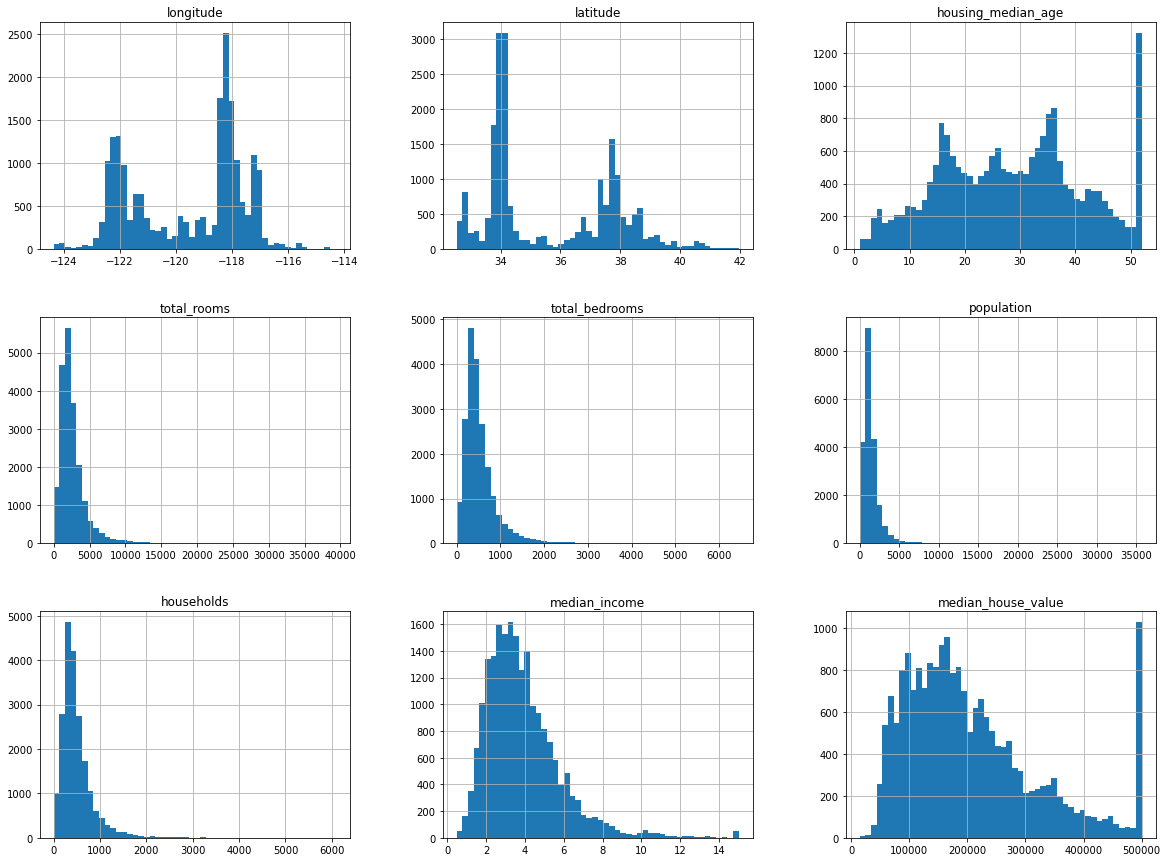

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


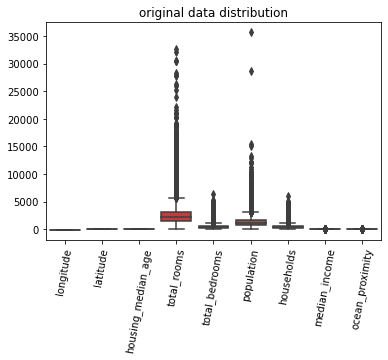

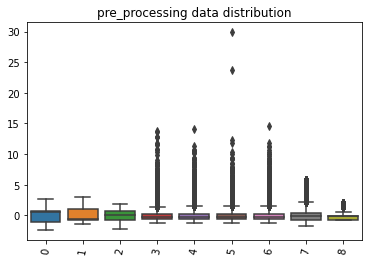

RMSE training fit: 35962.929
R2 training fit: 0.903 
RMSE prediction: 62165.295
R2 prediction: 0.710 


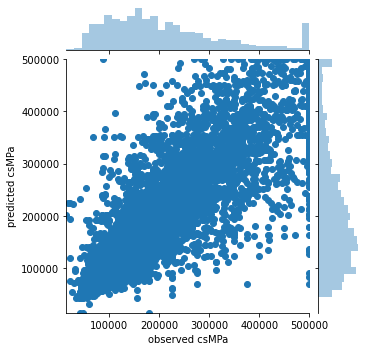

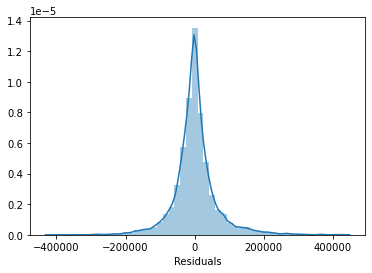

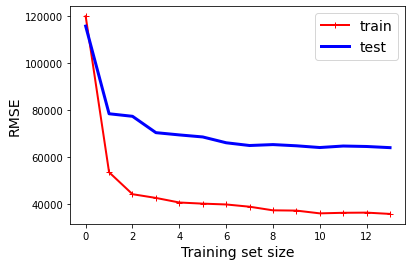

In [12]:
dataset_name = 'housing.csv'
model_name = 'decision_tree'
main(dataset_name,model_name)